<a href="https://colab.research.google.com/github/ADRIANVM117/data-science-portfolio/blob/main/clasificacion_TRADERS_HFT_VS_NON_HFT/clasificacion_TRADERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> EXAMEN MODULO I </b>
## <b> Adrián Vázquez Mora </b>
---
## <b> OBJETIVO:</b> Desarrolle un algoritmo para tratar de realizar predicciones

### <b> Dataframe:</b> comportamiento de traders en mercados financieros, que contiene estadísticas de sus operaciones para clasificar si son HFT (High Frequency Traders) o NON-HFT.
---
### <b> Elección de variable Objetivo: </b>  ``` type ```
- tipo de trader: HFT vs NON-HFT
  - variable categórica binaria (HFT y NON-HFT)
  - Diferenciar a los traders de alta frecuencia (HFT) de los que no lo son para entender comportamientos en el mercado.
---
### <b> Modelo: </b>
LDA (Analisis de Discriminante Lineal)
    
    1. Para clasificación: HFT | NON-HFT
    2. Encontrar las variables que mejor separan los tipos de traders
    3. Obtener probabilidades con interpretacion clara del comportamiento por tipo de trader

Analisis de supervivencia

    1. Analizar cuanto tiempo un trader esta activo en el mercado antes de una cancelacion o un evento  
    2. Si la variable objetivo se vuelve: tiempo hasta la primera cancelación
---




| **Variable**                 | **Descripción**                                                                          |
| ---------------------------- | ---------------------------------------------------------------------------------------- |
| `Index`                      | Identificador del registro (índice único).                                               |
| `Share`                      | Ticker o identificador del activo financiero (acción) en el que se invierte.             |
| `Day`                        | Fecha del evento de inversión.                                                           |
| `Trader`                     | Etiqueta o identificador del trader (inversionista).                                     |
| `OTR`                        | Número de intercambios realizados (trades).                                              |
| `OCR`                        | Número de eventos de cancelación de órdenes.                                             |
| `OMR`                        | Número de eventos de modificación de órdenes.                                            |
| `min_time_two_events`        | Mínimo tiempo entre dos eventos de trading.                                              |
| `mean_time_two_events`       | Tiempo promedio entre dos eventos.                                                       |
| `10_p_time_two_events`       | Percentil 10 del tiempo entre eventos.                                                   |
| `med_time_two_events`        | Mediana del tiempo entre eventos.                                                        |
| `25_p_time_two_events`       | Percentil 25 del tiempo entre eventos.                                                   |
| `75_p_time_two_events`       | Percentil 75 del tiempo entre eventos.                                                   |
| `90_p_time_two_events`       | Percentil 90 del tiempo entre eventos.                                                   |
| `max_time_two_events`        | Tiempo máximo entre dos eventos.                                                         |
| `min_lifetime_cancel`        | Mínimo tiempo de vida de una orden antes de ser cancelada.                               |
| `mean_lifetime_cancel`       | Promedio de tiempo de vida de una orden antes de cancelarse.                             |
| `10_p_lifetime_cancel`       | Percentil 10 del tiempo de vida de órdenes canceladas.                                   |
| `med_lifetime_cancel`        | Mediana del tiempo de vida de órdenes canceladas.                                        |
| `25_p_lifetime_cancel`       | Percentil 25 del tiempo de vida de órdenes canceladas.                                   |
| `75_p_lifetime_cancel`       | Percentil 75 del tiempo de vida de órdenes canceladas.                                   |
| `90_p_lifetime_cancel`       | Percentil 90 del tiempo de vida de órdenes canceladas.                                   |
| `max_lifetime_cancel`        | Tiempo máximo de vida antes de la cancelación.                                           |
| `NbTradeVenueMic`            | Número de mercados o venues en los que se operó.                                         |
| `MaxNbTradesBySecond`        | Máximo número de trades en un segundo.                                                   |
| `MeanNbTradesBySecond`       | Promedio de trades por segundo.                                                          |
| `min_dt_TV1`                 | Mínimo intervalo entre eventos en el primer mercado (TV1).                               |
| `mean_dt_TV1`                | Promedio del intervalo entre eventos en TV1.                                             |
| `med_dt_TV1`                 | Mediana del intervalo entre eventos en TV1.                                              |
| `min_dt_TV1_TV2`             | Mínimo intervalo entre eventos entre TV1 y TV2.                                          |
| `mean_dt_TV1_TV2`            | Promedio del intervalo entre eventos entre TV1 y TV2.                                    |
| `med_dt_TV1_TV2`             | Mediana del intervalo entre eventos entre TV1 y TV2.                                     |
| `min_dt_TV1_TV3`             | Mínimo intervalo entre eventos entre TV1 y TV3.                                          |
| `mean_dt_TV1_TV3`            | Promedio del intervalo entre eventos entre TV1 y TV3.                                    |
| `med_dt_TV1_TV3`             | Mediana del intervalo entre eventos entre TV1 y TV3.                                     |
| `min_dt_TV1_TV4`             | Mínimo intervalo entre eventos entre TV1 y TV4.                                          |
| `mean_dt_TV1_TV4`            | Promedio del intervalo entre eventos entre TV1 y TV4.                                    |
| `med_dt_TV1_TV4`             | Mediana del intervalo entre eventos entre TV1 y TV4.                                     |
| `NbSecondWithAtLeatOneTrade` | Número de segundos en que ocurrió al menos un trade.                                     |
| `type`                       | Tipo de trader: HFT (High Frequency Trader) o NON-HFT. **(Variable objetivo propuesta)** |


In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('/content/AMF_data.csv')
df.head()


,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT


In [3]:
!pip install autoviz
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from autoviz.AutoViz_Class import AutoViz_Class

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt

AV = AutoViz_Class()

# Ejecutar AutoViz solo para mostrar la tabla con info de variables
autov_report = AV.AutoViz(
    filename="",              # No es necesario si pasas el df directamente
    dfte=df,                  # Tu DataFrame cargado
    depVar="type",            # Variable objetivo
    verbose=0,                # Silencio de logs innecesarios
    lowess=False,             # Evita gráficos de suavizado
    chart_format='none',      # No mostrar gráficos
    max_rows_analyzed=50000,  # Límite de filas a analizar
    max_cols_analyzed=100     # Límite de columnas
)


    Since nrows is smaller than dataset, loading random sample of 50000 rows into pandas...
Shape of your Data Set loaded: (50000, 40)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    39 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
Since Number of Rows in data 50000 exceeds maximum, randomly sampling 50000 rows for EDA...

################ Binary_Classification problem #####################
There are 8416 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Share,object,0.000000,0,,,Possible high cardinality column with 119 unique values: Use hash encoding or text embedding to reduce dimension.
Day,object,0.000000,0,,,No issue
Trader,object,0.000000,0,,,40 rare categories: Too many to list. Group them into a single category or drop the categories.
OTR,float64,3.412370,NA,1.054124,8542.500000,"1419 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 4861 outliers greater than upper bound (84.66) or lower than lower bound(-44.82). Cap them or remove them."
OCR,float64,0.000000,NA,2.000000,2626.500000,Column has 3376 outliers greater than upper bound (52.66) or lower than lower bound(-27.77). Cap them or remove them.
OMR,float64,63.497980,NA,1.001960,11625.500000,"26405 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 1936 outliers greater than upper bound (65.74) or lower than lower bound(-35.79). Cap them or remove them."
min_time_two_events,float64,0.000000,NA,0.000000,52568.766000,Column has 6713 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
mean_time_two_events,float64,0.000000,NA,0.000065,52568.765630,Column has 2532 outliers greater than upper bound (15057.58) or lower than lower bound(-8932.68). Cap them or remove them.
10_p_time_two_events,float64,0.000000,NA,0.000000,52568.766000,"Column has 9473 outliers greater than upper bound (0.00) or lower than lower bound(-0.00). Cap them or remove them., Column has a high correlation with ['min_time_two_events']. Consider dropping one of them."
med_time_two_events,float64,0.000000,NA,0.000000,52568.766000,Column has 7333 outliers greater than upper bound (476.45) or lower than lower bound(-285.19). Cap them or remove them.


Total Number of Scatter Plots = 528


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for Share. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 254 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [4]:
!pip install sweetviz
import sweetviz as sv
!pip install numpy==1.24.3
# Compara HFT vs NON-HFT usando la columna 'type'
report = sv.compare_intra(df, condition_series=(df['type'] == 'HFT'), names=["HFT", "NON-HFT"])

# Mostrar en html
report.show_html("reporte_HFT_vs_NONHFT.html")


                                             |          | [  0%]   00:00 -> (? left)

Report reporte_HFT_vs_NONHFT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Principales Insights sobre el df usando SwtetViz y AutoViz
---
1.  Desbalance en la variable objetivo type
2.  Variables altamente discriminantes
---
<b> Variables altamente discriminantes </b>
- diferencias notables entre HFT y NON-HFT:

  - OTR
  - OCR
  - OMR

   - Los traders HFT tienden a tener mayores tasas de operaciones, cancelaciones y modificaciones.

  - NbTradeVenueMic
   - HFTs suelen operar en más mercados (venues) que NON-HFTs.

  - MaxNbTradesBySecond
   - En HFT hay mayor concentración de transacciones por segundo.

  - mean_time_two_events
   - En traders HFT, el tiempo entre eventos es mucho más corto, consistente con la lógica de alta frecuencia.

3. Valores Faltantes
  - OMR presenta más de 60% de valores faltantes.

  - min_dt_TV1_TV3 también supera el 40% de missing.


4.  Outliers
Muchas variables tienen outliers extremos, como max_time_two_events, MeanNbTradesBySecond y mean_lifetime_cancel.

  - Esto puede afectar la normalidad de las variables y distorsionar modelos como LDA.

  - ¿transformaciones logarítmicas?

5. Variables correlacionadas
Algunas variables de tiempo (mean_time_two_events, med_time_two_events, etc.) presentan altas correlaciones entre sí.
 - realizar análisis de colinealidad o aplicar PCA si el número de variables es muy grande.

6. Variables categóricas relevantes
 - Share y Trader podrían ser útiles como identificadores o para análisis grupales.
 - Day podría ayudar si se convierte a un índice temporal para análisis de series de tiempo (ARIMA).





# <b> Procesamiento de variables </b>
----

### 1.  Limpieza de Datos Faltantes

| Variable                     | % Faltantes | Acción                                       |
|-----------------------------|-------------|----------------------------------------------------------|
| `OMR`                       | 63.5%       | **Eliminar**|
| `min_dt_TV1_TV2`, `mean_dt_TV1_TV2`, ..., `med_dt_TV1_TV4` | ~40.5% | **Eliminar y altamente correlacionadas.** |
| `min_dt_TV1`, `mean_dt_TV1`, `med_dt_TV1` | 7.9%  | **Tratarlo,tienen valor informativo**. |
| `OTR`                       | 3.4%        | **Tratarlo, Es importante para el modelo** |

---

### 2. Variables Categóricas

| Variable   | Acción                                                                 |
|------------|------------------------------------------------------------------------|
| `Trader`   | One-Hot Encoding o codificar solo los más frecuentes para evitar overfitting. |
| `Share`    | Alta cardinalidad.  o eliminar si no aporta valor. |
| `Day`      | Baja correlación con `type`. Eliminar|

---

### 3. Detección y Tratamiento de Outliers

- Variables como `max_lifetime_cancel`, `MeanNbTradesBySecond`, `min_time_two_events` tienen muchos **outliers**.
  - Aplicar **capping (winsorization)** a los percentiles 1%-99%.
  - O utilizar **transformaciones logarítmicas** para reducir sesgo y facilitar LDA.

---

### 4.  Variables Multicolineales

- Muchas variables de tiempo están **altamente correlacionadas**:
  - Ejemp: `mean_time_two_events`, `med_time_two_events`, `25_p_time_two_events`.
  - Conservar solo una por grupo correlacionado.
  - O usar **PCA (Análisis de Componentes Principales)** para reducir dimensiones.

---

### 5. 📉 Selección de Variables para LDA

- `OTR`
- `OCR`
- `NbTradeVenueMic`
- `MaxNbTradesBySecond`
- `MeanNbTradesBySecond`
- `mean_time_two_events` **o** `med_time_two_events`
- `mean_lifetime_cancel` **o** `max_lifetime_cancel`
- `NbSecondWithAtLeatOneTrade`

La variable objetivo es: `type` (clasificación binaria).

---


## <b> Limpieza de datos faltantes </b>

In [3]:
# Variables con demasiados nulos o que deben descartarse por redundancia/correlación
vars_to_drop = [
    'OMR',
    'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2',
    'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 'med_dt_TV1_TV3',
    'min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4',
    'Share', 'Day'  # Por alta cardinalidad o baja utilidad
]

# Eliminar columnas
df_cleaned = df.drop(columns=vars_to_drop)

# Verificación: mostrar variables con valores faltantes que sí se pueden imputar
na_counts = df_cleaned.isna().sum()
na_percent = (na_counts / len(df_cleaned)) * 100

# Filtrar solo las variables con al menos un valor faltante
na_summary = pd.DataFrame({
    'Missing_Values': na_counts[na_counts > 0],
    'Missing_Percent': na_percent[na_counts > 0].round(2)
})

# Mostrar resumen
print("Variables restantes con valores faltantes (a imputar):")
print(na_summary)

# Asegurar que 'type' está codificada como numérica
df_cleaned['type'] = df_cleaned['type'].map({'HFT': 1, 'NON HFT': 0})


Variables restantes con valores faltantes (a imputar):
             Missing_Values  Missing_Percent
OTR                    1600             2.95
min_dt_TV1             3714             6.84
mean_dt_TV1            3714             6.84
med_dt_TV1             3714             6.84


#### <b> Observaciones </b>:
Dado que OTR presenta apenas 2.95% de NaN < 5% una imputación simple seria lo adecuado: Analizamos su distribución y de ahi seleccionamos el metodo de imutación.  Mientras que min_dt_TV1, mean_dt_TV1  y med_dt_TV1 presentan 6.84% > 5% considerar una imputación avanzada    

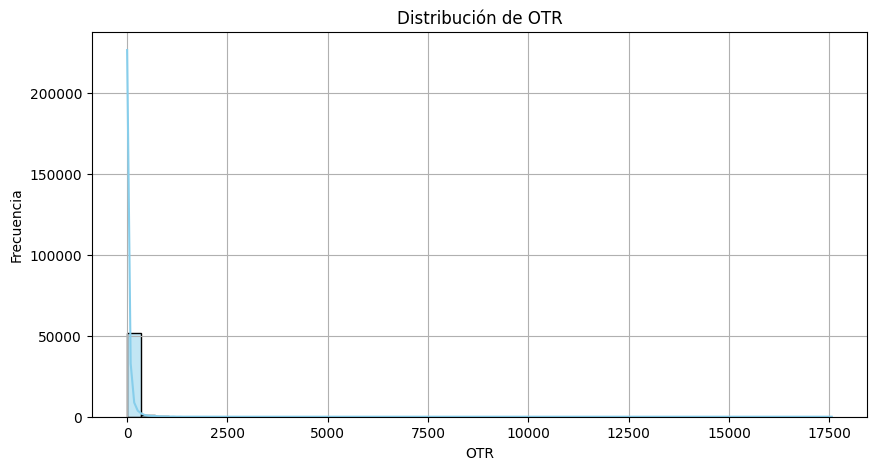

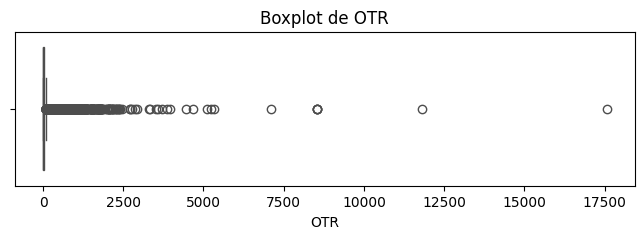

Shapiro-Wilk test: p-value = 0.0000
→ La distribución NO es normal (usar mediana para imputar)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Filtrar la columna sin NaNs para análisis de distribución
otr_sin_nan = df_cleaned['OTR'].dropna()

# Histograma + KDE
plt.figure(figsize=(10, 5))
sns.histplot(otr_sin_nan, kde=True, bins=50, color='skyblue')
plt.title('Distribución de OTR')
plt.xlabel('OTR')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot para ver outliers
plt.figure(figsize=(8, 2))
sns.boxplot(x=otr_sin_nan, color='orange')
plt.title('Boxplot de OTR')
plt.show()

# Test de normalidad (Shapiro-Wilk) - usar si muestra < 5000
if len(otr_sin_nan) > 5000:
    sample = otr_sin_nan.sample(5000, random_state=42)
else:
    sample = otr_sin_nan

stat, p = stats.shapiro(sample)
print(f"Shapiro-Wilk test: p-value = {p:.4f}")

if p < 0.05:
    print("La distribución NO es normal (usar mediana para imputar)")
else:
    print("La distribución parece normal (usar media para imputar)")


In [6]:
# Usaremos la mediana: muchos outliers, asimetria p-value <0.05
# Calcular la mediana de OTR sin valores faltantes
mediana_otr = df_cleaned['OTR'].median()

# Imputar NaN con la mediana
df_cleaned['OTR'] = df_cleaned['OTR'].fillna(mediana_otr)

Valores faltantes en OTR después de imputar: 0



 Análisis de distribución para: min_dt_TV1
Shapiro-Wilk p-value: 0.0000
No es normal: usar MEDIANA para imputar


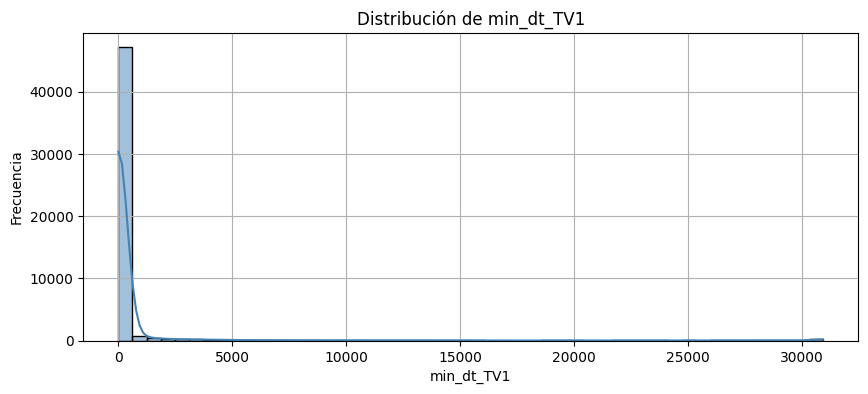

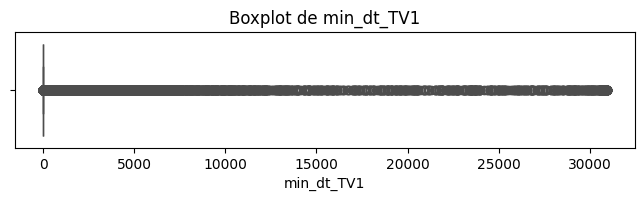


 Análisis de distribución para: mean_dt_TV1
Shapiro-Wilk p-value: 0.0000
No es normal: usar MEDIANA para imputar


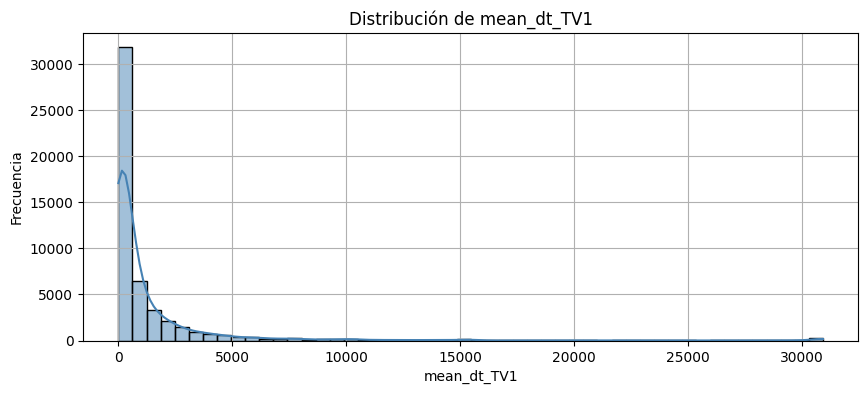

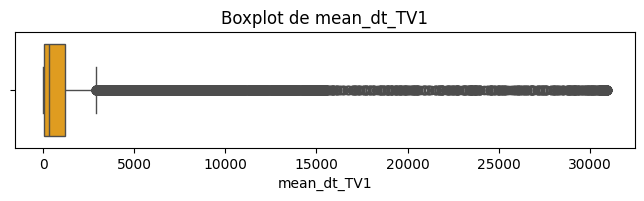


 Análisis de distribución para: med_dt_TV1
Shapiro-Wilk p-value: 0.0000
No es normal: usar MEDIANA para imputar


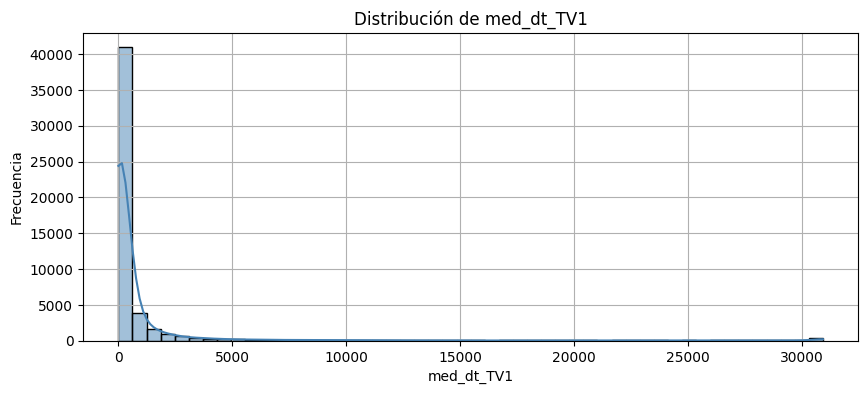

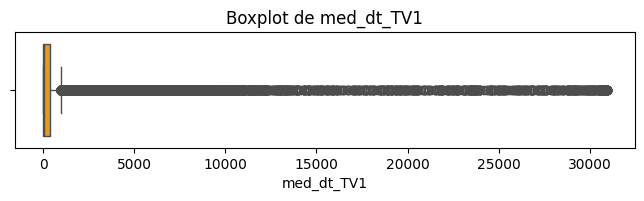

In [8]:
from scipy.stats import shapiro
variables = ['min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1']

for col in variables:
    data = df_cleaned[col].dropna()
    sample = data.sample(5000, random_state=42) if len(data) > 5000 else data

    print(f"\n Análisis de distribución para: {col}")

    # Shapiro-Wilk test
    stat, p = shapiro(sample)
    print(f"Shapiro-Wilk p-value: {p:.4f}")
    if p < 0.05:
        print("No es normal: usar MEDIANA para imputar")
    else:
        print("Aproximadamente normal : MEDIA")

    # Histograma + KDE
    plt.figure(figsize=(10, 4))
    sns.histplot(data, kde=True, bins=50, color='steelblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=data, color='orange')
    plt.title(f'Boxplot de {col}')
    plt.show()


In [9]:
# Imputar con la mediana para las tres variables de tiempo
variables = ['min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1']

for col in variables:
    mediana = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(mediana)



### <b> Calcular correlación con variable objetivo  </b> ```type```

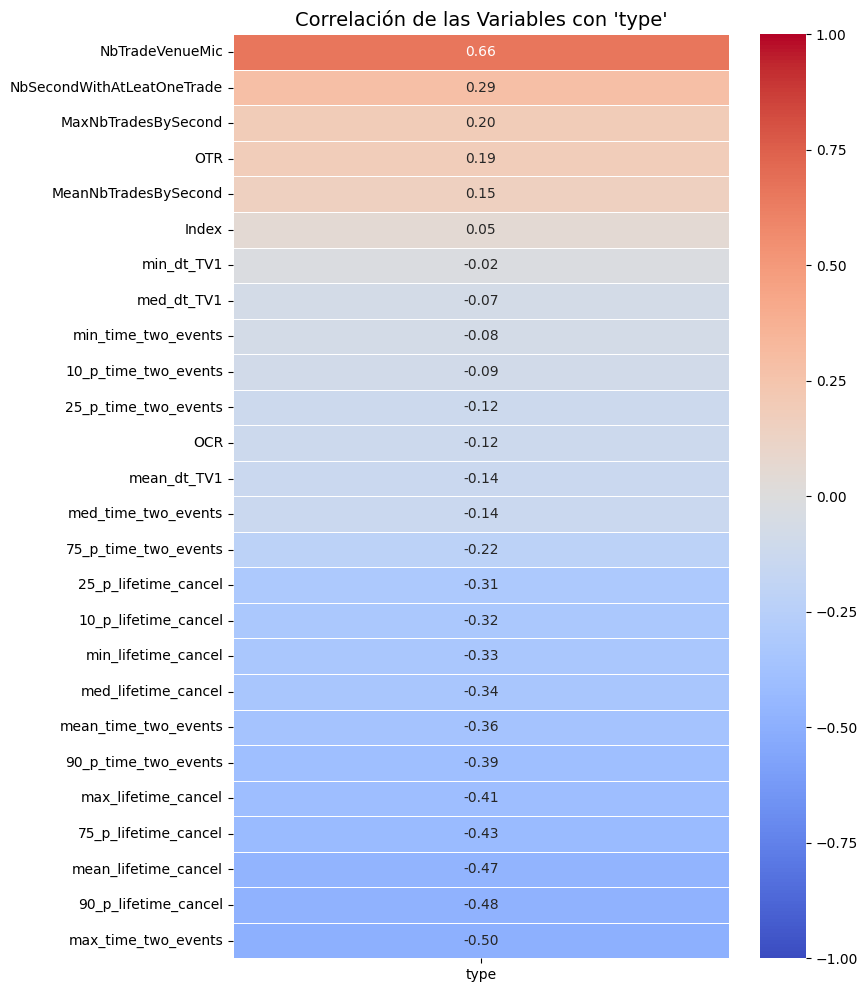

In [10]:
# Crear copia SOLO con variables numéricas incluyendo 'type'
df_numerico = df_cleaned.select_dtypes(include='number')

# Calcular matriz de correlación
correlation_matrix = df_numerico.corr()

# Extraer la correlación con 'type'
correlaciones = correlation_matrix['type'].drop('type').sort_values(ascending=False)

# Convertir a DataFrame para graficar
correlaciones_df = correlaciones.to_frame()

# Graficar heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 12))
sns.heatmap(correlaciones_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlación de las Variables con 'type'", fontsize=14)
plt.show()

### <B> Manejo de variable cateorica: </B> Trader
- existen 62 categorias, opción ? codificar el top 5 traders mas frecuentes, todos los demas en una categoria.

In [16]:
df_cleaned['Trader'].value_counts()

,count
Trader,
Trader_161,7587
Trader_386,5808
Trader_328,2534
Trader_136,2515
Trader_226,2486
...,...
Trader_149,4
Trader_191,4
Trader_375,4


In [19]:
# Obtener los 5 traders más frecuentes
top_traders = df_cleaned['Trader'].value_counts().nlargest(5).index.tolist()

# Crear nueva columna simplificada
df_cleaned['Trader_simplified'] = df_cleaned['Trader'].apply(lambda x: x if x in top_traders else 'otro')

# One-Hot Encoding a los 5 más frecuentes + Other
df_traders = pd.get_dummies(df_cleaned['Trader_simplified'], prefix='Trader')

# Eliminar columna original
df_cleaned = df_cleaned.drop(columns=['Trader', 'Trader_simplified'])

# Agregar dummies al DataFrame limpio
df_cleaned = pd.concat([df_cleaned, df_traders], axis=1)


KeyError: 'Trader'

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54299 entries, 0 to 54298
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Index                       54299 non-null  int64  
 1   OTR                         54299 non-null  float64
 2   OCR                         54299 non-null  float64
 3   min_time_two_events         54299 non-null  float64
 4   mean_time_two_events        54299 non-null  float64
 5   10_p_time_two_events        54299 non-null  float64
 6   med_time_two_events         54299 non-null  float64
 7   25_p_time_two_events        54299 non-null  float64
 8   75_p_time_two_events        54299 non-null  float64
 9   90_p_time_two_events        54299 non-null  float64
 10  max_time_two_events         54299 non-null  float64
 11  min_lifetime_cancel         54299 non-null  float64
 12  mean_lifetime_cancel        54299 non-null  float64
 13  10_p_lifetime_cancel        542

### <b> Detección y Tratamiento de Outliers </b>

In [23]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Lista de variables
variables = ['max_lifetime_cancel', 'MeanNbTradesBySecond', 'min_time_two_events']

# Crear el archivo PDF
with PdfPages('comparacion_outliers.pdf') as pdf:
    for col in variables:
        x = df_cleaned[col].dropna()

        # Winsorization
        q1, q99 = x.quantile([0.01, 0.99])
        x_capped = x.clip(lower=q1, upper=q99)

        # Log-transform
        x_log = np.log1p(x)

        # Crear figura
        fig, axes = plt.subplots(3, 2, figsize=(12, 10))
        fig.suptitle(f'Comparación de Capping vs Log para {col}', fontsize=16)

        sns.histplot(x, bins=50, kde=True, ax=axes[0, 0], color='gray')
        axes[0, 0].set_title('Original')
        sns.boxplot(x=x, ax=axes[0, 1], color='gray')
        axes[0, 1].set_title('Boxplot Original')

        sns.histplot(x_capped, bins=50, kde=True, ax=axes[1, 0], color='skyblue')
        axes[1, 0].set_title('Capping (1%-99%)')
        sns.boxplot(x=x_capped, ax=axes[1, 1], color='skyblue')
        axes[1, 1].set_title('Boxplot Capping')

        sns.histplot(x_log, bins=50, kde=True, ax=axes[2, 0], color='orange')
        axes[2, 0].set_title('Log Transform')
        sns.boxplot(x=x_log, ax=axes[2, 1], color='orange')
        axes[2, 1].set_title('Boxplot Log')

        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # Guardar la figura actual en el PDF
        pdf.savefig(fig)
        plt.close(fig)

#### <b> Conclusión:  </b>

1. max_lifetime_cancel : <b>capping</b>

- La log-transformación reduce el rango pero aplasta demasiado la escala.
- El capping suaviza los outliers sin alterar la forma de la variable ni su escala.

2. MeanNbTradesBySecond : <b>Log-transformación </b>

- La distribución es muy sesgada a la derecha.
- La log transforma la variable en algo cercano a simétrico, bueno para el LDA.

3. min_time_two_events : Log-transformación

- Tiene cola larga positiva (outliers en el extremo derecho).
- La log mejora la forma y elimina el sesgo que se ve,

In [24]:
import numpy as np

#Capping para max_lifetime_cancel
q1, q99 = df_cleaned['max_lifetime_cancel'].quantile([0.01, 0.99])
df_cleaned['max_lifetime_cancel'] = df_cleaned['max_lifetime_cancel'].clip(lower=q1, upper=q99)
print(f"Capping aplicado a max_lifetime_cancel entre [{q1:.2f}, {q99:.2f}]")

#  Log-transform para MeanNbTradesBySecond
df_cleaned['MeanNbTradesBySecond'] = np.log1p(df_cleaned['MeanNbTradesBySecond'])

# Log-transform para min_time_two_events
df_cleaned['min_time_two_events'] = np.log1p(df_cleaned['min_time_two_events'])


Capping aplicado a max_lifetime_cancel entre [2.80, 51992.48]


### <b>  Detección y tratamiento de multicolinealidad  </b>

#### <B> Obtener el minino de componentes principales que expliquen el 80% de varianza y agregarlas al df  </B>

Número mínimo de componentes que explican al menos el 80% de la varianza: 4


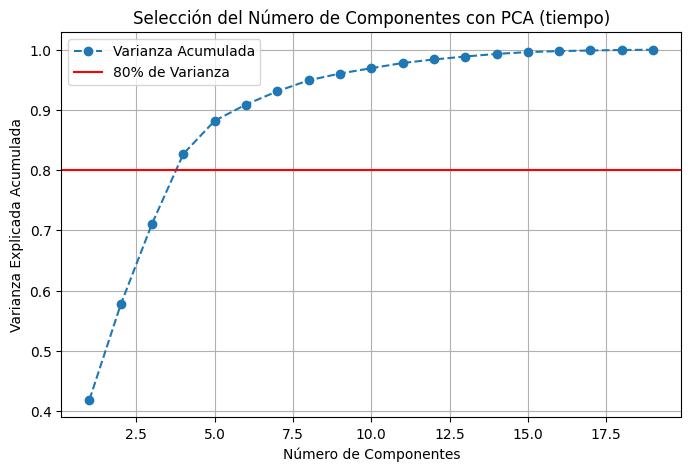

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Seleccionar columnas de tiempo (ya identificadas)
time_cols = [col for col in df_cleaned.columns if 'time' in col or 'dt' in col]
df_tiempo = df_cleaned[time_cols]

# 2. Estandarizar
scaler = StandardScaler()
df_tiempo_scaled = scaler.fit_transform(df_tiempo)

# 3. PCA preliminar para ver la varianza acumulada
pca_check = PCA()
pca_check.fit(df_tiempo_scaled)

varianza_acumulada = np.cumsum(pca_check.explained_variance_ratio_)

# 4. Número mínimo de componentes que explican al menos el 80%
num_componentes_optimos = np.argmax(varianza_acumulada >= 0.80) + 1
print(f"Número mínimo de componentes que explican al menos el 80% de la varianza: {num_componentes_optimos}")

# 5. Aplicar PCA definitivo con ese número de componentes
pca_final = PCA(n_components=num_componentes_optimos)
tiempo_pca_reducido = pca_final.fit_transform(df_tiempo_scaled)

# 6. Crear DataFrame de componentes
columnas_pca = [f"PCA_time_{i+1}" for i in range(num_componentes_optimos)]
df_pca = pd.DataFrame(tiempo_pca_reducido, columns=columnas_pca, index=df_cleaned.index)

# 7. Integrar al DataFrame original, eliminando columnas de tiempo originales
df_cleaned = df_cleaned.drop(columns=time_cols)
df_cleaned = pd.concat([df_cleaned, df_pca], axis=1)

# 8. Graficar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='--', label='Varianza Acumulada')
plt.axhline(y=0.80, color='r', linestyle='-', label='80% de Varianza')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Selección del Número de Componentes con PCA (tiempo)")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
df_cleaned

,Index,OTR,OCR,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,NbSecondWithAtLeatOneTrade,type,Trader_Other,Trader_Trader_136,Trader_Trader_161,Trader_Trader_226,Trader_Trader_328,Trader_Trader_386,PCA_time_1,PCA_time_2,PCA_time_3,PCA_time_4
0,1,2.272727,8.333333,1,7,1.321756,4,0,True,False,False,False,False,False,0.179019,0.760426,-1.169613,-0.941161
1,2,1.696629,25.166667,1,17,1.936341,15,0,True,False,False,False,False,False,-1.226855,-0.570765,-0.172238,-0.133147
2,3,1.482759,47.300000,1,20,1.802286,63,0,True,False,False,False,False,False,-1.939503,-0.280650,0.250935,0.045907
3,4,1.705882,14.500000,1,8,1.658228,4,0,True,False,False,False,False,False,-0.531546,-0.508879,-0.384420,-0.151839
4,5,1.517730,26.750000,1,19,1.549800,38,0,True,False,False,False,False,False,-0.676319,-0.634695,-0.403237,0.207660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,105778,1.150000,23.000000,1,15,2.036882,3,0,True,False,False,False,False,False,-0.997259,0.484468,0.451387,1.502001
54295,105779,1.352941,23.000000,1,4,1.232144,7,0,True,False,False,False,False,False,-2.557919,0.274747,0.743768,0.526491
54296,105780,1.146667,86.000000,1,21,1.738271,16,0,True,False,False,False,False,False,2.351301,0.782715,-0.114421,3.896023
54297,105781,1.179191,204.000000,1,30,1.782190,35,0,True,False,False,False,False,False,1.413889,0.613346,0.074486,3.297975


## <b> Entrenamiento, evaluación del Modelo LDA  </b>

📊 Clasification Report:
              precision    recall  f1-score   support

     NON-HFT       0.93      0.93      0.93      6705
         HFT       0.95      0.95      0.95      9585

    accuracy                           0.94     16290
   macro avg       0.94      0.94      0.94     16290
weighted avg       0.94      0.94      0.94     16290



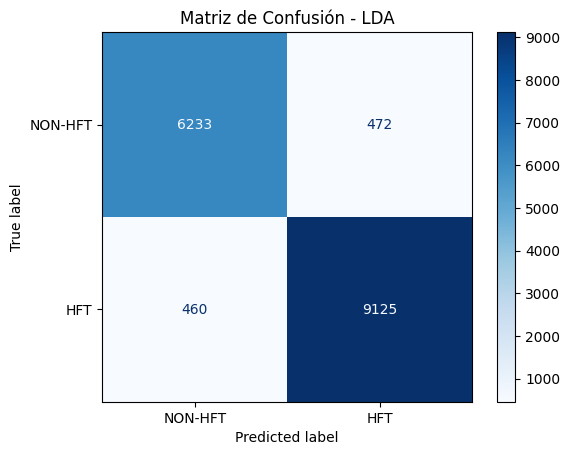

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Separar variables predictoras (X) y variable objetivo (y)
X = df_cleaned.drop(columns='type')
y = df_cleaned['type']

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Entrenar modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 4. Predicciones
y_pred = lda.predict(X_test)

# 5. Evaluación del modelo
print(" Clasification Report:")
print(classification_report(y_test, y_pred, target_names=["NON-HFT", "HFT"]))

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NON-HFT", "HFT"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - LDA")
plt.grid(False)
plt.show()


### <b> Observaciones </b>
-  El modelo clasifica correctamente el 94% de los traders
- Alta precisión y recall en ambas clases, lo que indica un buen balance.
- Ligeramente mejor rendimiento en la clase mayoritaria (HFT)

<b> Matriz de confusión </b>
- Verdaderos positivos (TP HFT): 9,125 : <b>correctamente clasificados</b>

- Verdaderos negativos (TN NON-HFT): 6,233 : <b>correctamente clasificados</b>
- Falsos positivos: 472 NON-HFT  <b>mal clasificados</b>.

- Falsos negativos: 460 → <b>mal clasificados</b>.

el modelo tiene bajo costo de error y no hay sobreajuste ni sesgo de clase.

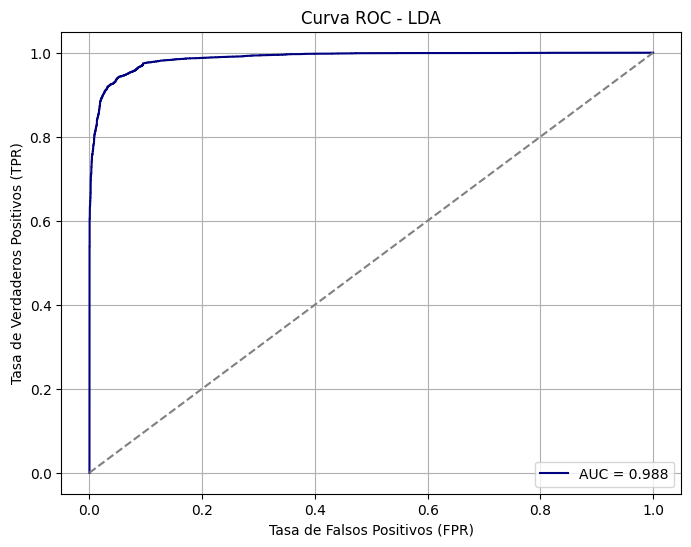

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener probabilidades de clase positiva (HFT = 1)
y_proba = lda.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea aleatoria
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - LDA')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


 - el modelo tiene excelente capacidad de discriminación.

----
¿Por qué utilicé LDA y no otro modelo?
Porque LDA es rápido, fácil de interpretar y funciona muy bien cuando las clases están separadas linealmente, como en este caso. Además, ya tenía los datos bien preparados (con PCA y codificación), así que LDA encajaba perfecto y dio muy buenos resultados.

¿Y si tuviera que usar otro modelo?
Probablemente probaría con un árbol de decisión o un random forest. Son buenos para captar relaciones más complejas y también funcionan bien con variables categóricas sin tanto preprocesamiento.